<a href="https://colab.research.google.com/github/felixM2020/MNIST-Classification/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST Machine Learning Practice (Convolutional Neural Network)

###Define Model

####Process:
Image ->
convolution (32 3x3 filters) -> nonlinearity (ReLU) ->

convolution (32 3x3 filters) -> nonlinearity (ReLU) -> (2x2 max pool) ->

convolution (64 3x3 filters) -> nonlinearity (ReLU) ->
convolution (64 3x3 filters) -> nonlinearity (ReLU) -> (2x2 max pool) ->
flatten -> fully connected (256 hidden units) -> nonlinearity (ReLU) ->

fully connected (10 hidden units) -> softmax

In [6]:
import torch.nn as nn

class CNN_Net(nn.Module):
  
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5, padding=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=5, padding=2)
        self.fc1 = nn.Linear(7*7*64, 256)
        self.fc2 = nn.Linear(256, 10)
    
    def forward(self, x):
        # conv layer 1
        x = self.conv1(x)
        x = F.relu(x)
        
        # conv layer 2
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        
        # conv layer 3
        x = self.conv3(x)
        x = F.relu(x)
        
        # conv layer 4
        x = self.conv4(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        
        # fc layer 1
        x = x.view(-1, 7*7*64)
        x = self.fc1(x)
        x = F.relu(x)
        
        # fc layer 2
        x = self.fc2(x)
        return x      


Import libraries

In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm, trange


Import/ Load Data

In [8]:
# Load the data
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)


Define Model and Loss Functions

In [9]:

## Training
# Instantiate model  
model = CNN_Net()  # <---- change here

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # <---- change here


Train Model

In [10]:
# Iterate through train set minibatchs 
  # <---- change here
for images, labels in tqdm(train_loader):
        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        x = images  # <---- change here 
        y = model(x)
        loss = criterion(y, labels)
        # Backward pass
        loss.backward()
        optimizer.step()



  0%|          | 0/600 [00:00<?, ?it/s]

Test

In [18]:
## Testing
correct = 0
total = len(mnist_test)
preds = []

with torch.no_grad():
    # Iterate through test set minibatchs 
    for images, labels in tqdm(test_loader):
        # Forward pass
        x = images  # <---- change here 
        y = model(x)
        preds.append(y)

        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())

print('Test accuracy: {}'.format(correct/total))

  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy: 0.9800000190734863


Show example of test data

Default image shape: torch.Size([1, 28, 28])
Reshaped image shape: torch.Size([28, 28])


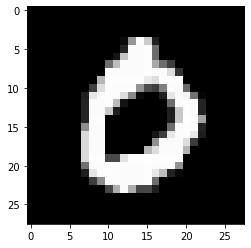

In [24]:
import matplotlib.pyplot as plt
# Pick out the 4th (0-indexed) example from the training set
image, label = mnist_test[3]
# Plot the image
print("Default image shape: {}".format(image.shape))
image = image.reshape([28,28])
print("Reshaped image shape: {}".format(image.shape))
plt.imshow(image, cmap="gray")
